In [ ]:
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip install manim
!pip install IPython --upgrade

In [ ]:
from manim import *

Manim Community v0.17.3

In [ ]:
%%manim -qm -v WARNING SquareToCircle

class SquareToCircle(Scene):
   def construct(self):
      square = Square()
      circle = Circle()
      circle.set_fill(PINK, opacity=0.5)
      self.play(Create(square))
      self.play(Transform(square, circle))
      self.wait()

In [ ]:
# %%manim -qh -v WARNING ExampleCylinder

SIDE = 1.75


class ExampleCylinder(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes()
        cylinder = Cylinder(
            radius=1.5, 
            height=0.75,
            stroke_width=0.0,
            fill_color=ORANGE,
            resolution=24,
            stroke_color=ORANGE,
            checkerboard_colors=[ORANGE, ORANGE],
            )
        
        north_pole_label = Text(
            "N", 
            font_size=24
            ).shift(3 * DOWN)
        south_pole_label = Text(
            "S", 
            color=BLACK, 
            font_size=24).shift(3 * UP)

        np_magnet = Cube(
            side_length=SIDE, 
            fill_color=PURE_RED).shift(3 * DOWN)
        sp_magnet = Cube(
            side_length=SIDE, 
            fill_color=PURE_BLUE).shift(3 * UP)

        field_lines = VGroup()
        temp1 = -1 * SIDE / 2
        for i in range(3):
            temp1+=SIDE/4
            temp2 = -1 * SIDE / 2
            for j in range(3):
                temp2+=SIDE/4
                field_lines.add(
                    Arrow3D(start=[round(temp1, 2), -1*(3-SIDE/2), round(temp2, 2)], 
                            end=[round(temp1, 2), 3-SIDE/2, round(temp2, 2)],
                            thickness=0.01,
                            color=GREEN_B,
                            )
                    )

        self.set_camera_orientation(phi=75 * DEGREES, theta=30 * DEGREES)
        # self.add(axes)
        self.play(Create(cylinder), run_time=0.5)
        self.wait(0.5)
        self.play(Rotate(cylinder, angle=PI/2, about_point=ORIGIN, axis=np.array([1, 0, 0])))
        self.play(FadeIn(np_magnet), FadeIn(sp_magnet))
        self.add_fixed_orientation_mobjects(north_pole_label, south_pole_label)
        self.play(Create(field_lines))
        self.wait()


with tempconfig({"quality": "high_quality", "disable_caching": True}):
    scene = ExampleCylinder()
    scene.render()

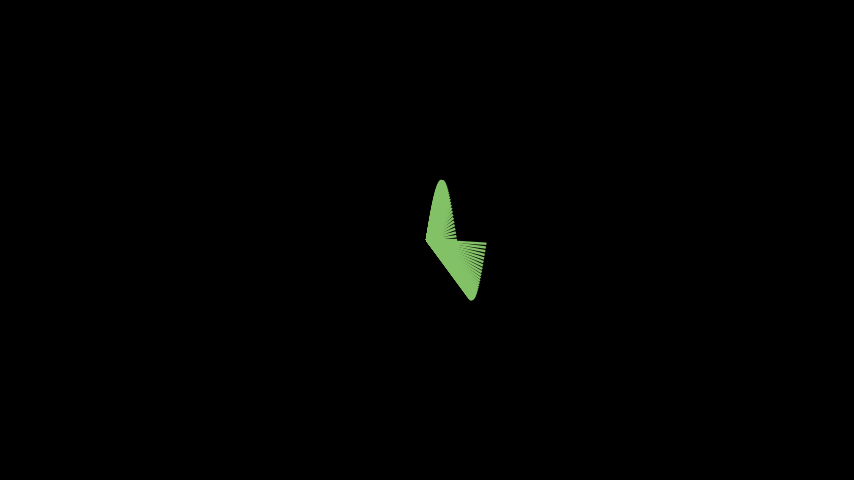

In [ ]:
%%manim -ql -v WARNING MagneticField


class MagneticField(Scene):
    def construct(self):
        # Create the north and south poles
        # north_pole = Cube(color=RED)
        # south_pole = Cube(color=BLUE)

        # Create the magnetic field lines
        field_lines = VGroup()
        for i in range(100):
            x = i / 100
            y = np.sin(x * 2 * np.pi)
            z = np.cos(x * 2 * np.pi)
            field_line = Line(start=(0, 0, 0), end=(x, y, z), color=GREEN)
            field_lines.add(field_line)

        # Animate the field lines
        # self.play(
        #     FadeIn(north_pole),
        #     FadeIn(south_pole),
        #     FadeIn(field_lines),
        #     run_time=5,
        # )

        self.add(field_lines)